this cell disables sci-kit learn warnings

In [29]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Q6

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [32]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, train_size=0.7,test_size=0.3, random_state=101)

Part A:

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
class ForwardSelection:
    def __init__(self,train_data,train_label,test_data,test_label):
        self.train = np.array(train_data)
        self.train_label = train_label.reshape(-1,1)
        self.test = np.array(test_data)
        self.test_label = test_label.reshape(-1,1)
    def forward(self):
        selected_features_index = []
        acc_list = []
        for j in range(len(self.train[0])):
            max_acc = 0
            feature_index = None
            for i in range(len(self.train[0])):
                '''Write your code here'''
                if i in selected_features_index:
                    continue
                temp = selected_features_index.copy()
                temp.append(i)
                x = self.train[:, temp]
                x_test = self.test[:, temp]

                clf = MultinomialNB()
                clf.fit(x, self.train_label)
                acc = accuracy_score(self.test_label, clf.predict(x_test))
                if(acc > max_acc):
                    max_acc = acc
                    feature_index = i

            selected_features_index.append(feature_index)
            acc_list.append(max_acc)

        return selected_features_index,acc_list

In [34]:
f = ForwardSelection(X_train,y_train,X_test,y_test)
selected,acc_list = f.forward()

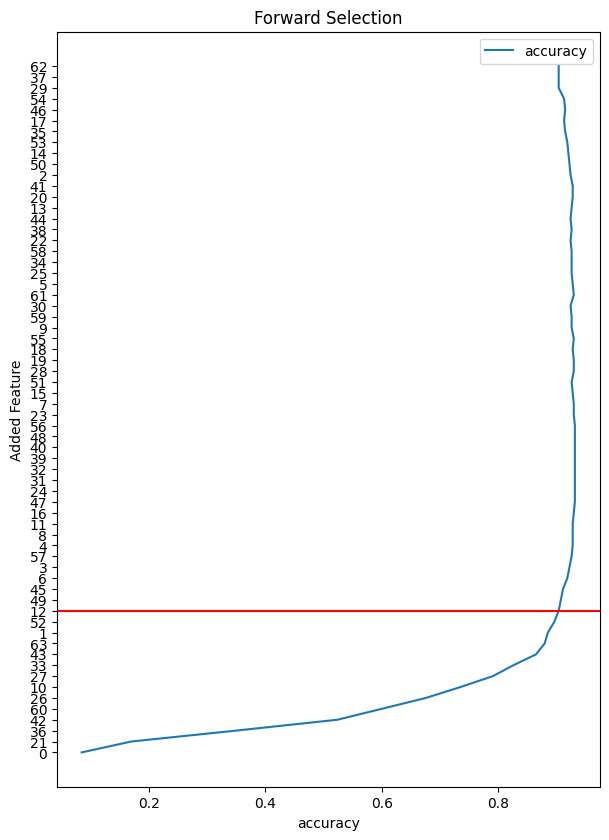

In [35]:
import pandas as pd
df = pd.DataFrame({'accuracy': range(len(acc_list)), 'x': acc_list})
df.plot(x='x', figsize=(7,10))
plt.gcf().set_dpi(100)
plt.xlabel("accuracy")
plt.ylabel("Added Feature")
plt.yticks(range(len(acc_list)), selected)
plt.title("Forward Selection")
th = 0
while acc_list[th] < 0.9:
    th +=1
plt.axhline(y=th, color='red')
plt.show()

Part B:

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
class BackwardSelection:
    def __init__(self,train_data,train_label,test_data,test_label):
        self.train = np.array(train_data)
        self.train_label = train_label.reshape(-1,1)
        self.test = np.array(test_data)
        self.test_label = test_label.reshape(-1,1)
    def backward(self):
        removed_features_index = []
        acc_list = []
        for j in range(len(self.train[0])):
            max_acc = 0
            feature_index = None
            for i in range(len(self.train[0])-1):
                '''Write your code here'''
                if i in removed_features_index:
                    continue
                x = self.train
                x_test = self.test
                temp = removed_features_index.copy()
                temp.append(i)
                x = np.delete(x, temp, 1)
                x_test = np.delete(x_test, temp, 1)
                
                clf = MultinomialNB()
                clf.fit(x, self.train_label)
                acc = accuracy_score(self.test_label, clf.predict(x_test))
                if acc > max_acc:
                    max_acc = acc
                    feature_index = i

            removed_features_index.append(feature_index)
            acc_list.append(max_acc)  
        return removed_features_index,acc_list

In [37]:
b = BackwardSelection(X_train,y_train,X_test,y_test)
removed,acc_list = b.backward()

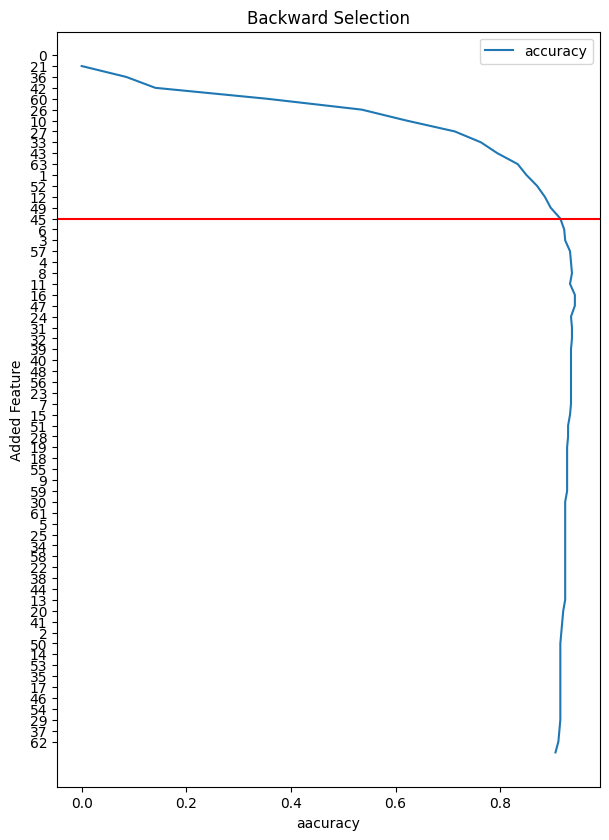

In [38]:
df = pd.DataFrame({'accuracy': range(len(acc_list)), 'x': acc_list})
df.plot(x='x', figsize=(7,10))
th = len(acc_list)-1
while acc_list[th] < 0.9:
    th -=1
plt.axhline(y=th, color='red')
plt.gcf().set_dpi(100)
plt.xlabel("aacuracy")
plt.ylabel("Added Feature")
plt.yticks(range(len(acc_list),0,-1), selected)
plt.title("Backward Selection")
plt.show()

# Q7

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [40]:
def Si(data, labels=None):
    # Si Covariance matrix of the ith class

    m = data.mean(axis = 0)
    ans = np.zeros((m.shape[0], m.shape[0]))
    for sample in data:
        ans += (sample - m).reshape(-1,1) @ (sample - m).reshape(-1,1).T
    return ans

def Sw(data, labels):
    # Sw Within-class scatter matrix

    classes = list('')
    for i in range(np.unique(labels).shape[0]):
        classes.append(list(''))
    for i in range(data.shape[0]):
        classes[labels[i]].append(data[i])
    ans = np.zeros((data.shape[1], data.shape[1]))
    for i in range(np.unique(labels).shape[0]):
        ans += Si(np.array(classes[i]))
    return ans
    
def Sb(data, labels):
    # SB Between-class scatter matrix

    classes = list('')
    for i in range(np.unique(labels).shape[0]):
        classes.append(list(''))
    for i in range(data.shape[0]):
        classes[labels[i]].append(data[i])
    means = list('')
    for i in range(np.unique(labels).shape[0]):
        means.append(np.mean(np.array(classes[i]), axis=0))
    m = np.mean(data, axis=0)
    ans = np.zeros((m.shape[0], m.shape[0]))
    for i in range(np.unique(labels).shape[0]):
        ans += (len(classes[i]) * (means[i] - m).reshape(-1, 1) @ (means[i] - m).reshape(-1, 1).T)
    return (ans)

def LDA(data, labels):
    temp = np.linalg.pinv(Sw(data, labels)).dot(Sb(data, labels))
    eigen_values, eigen_vectors = np.linalg.eig(temp)
    w = eigen_vectors[np.argsort(-eigen_values)]
    return w

In [41]:
data = digits.data
labels = digits.target
w = LDA(data, labels)

I have no idea what I have done in the next cell! <br>
By the way, plot looks good :)

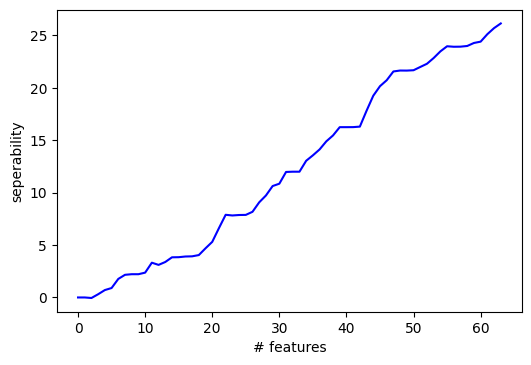

In [42]:
seperability = np.linalg.pinv(Sw(data, labels)).dot(Sb(data, labels))
y = list("")
for i in range(seperability.shape[0]):
    y.append(np.trace(seperability[:i,:i]))

plt.plot(range(len(y)), y, '-b')
plt.xlabel('# features')
plt.ylabel('seperability')
plt.gcf().set_dpi(100)
plt.show()

# Q8

In [43]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

Part A

In [44]:
def PCATransformer(X, component):
    '''write your code here'''
    cov = np.cov(X.T)
    eig_val, eig_vec = np.linalg.eig(cov)
    
    sort_indice = np.argsort(-eig_val)
    eig_val = eig_val[sort_indice[:component]]
    eig_vec = eig_vec[sort_indice[:component]]
    
    projected = X.dot(eig_vec.T)

    explained_variance = eig_val/ np.sum(eig_val)
    cum_var = np.cumsum(explained_variance)
    return projected, cum_var, eig_vec

projected, cum_var, _ = PCATransformer(faces.data,2)

/home/kassra/.local/lib/python3.8/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

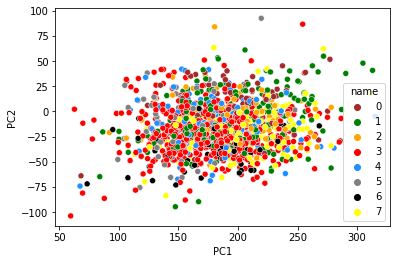

In [45]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(projected, columns=['PC1', 'PC2'])
df['name'] = faces.target
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                  4: 'dodgerblue',
                  5: 'gray',
                  6: 'black',
                  7: 'yellow'})
sns.scatterplot(data=df, x="PC1", y="PC2", hue="name", palette=color_dict)

Part B:

83


/home/kassra/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


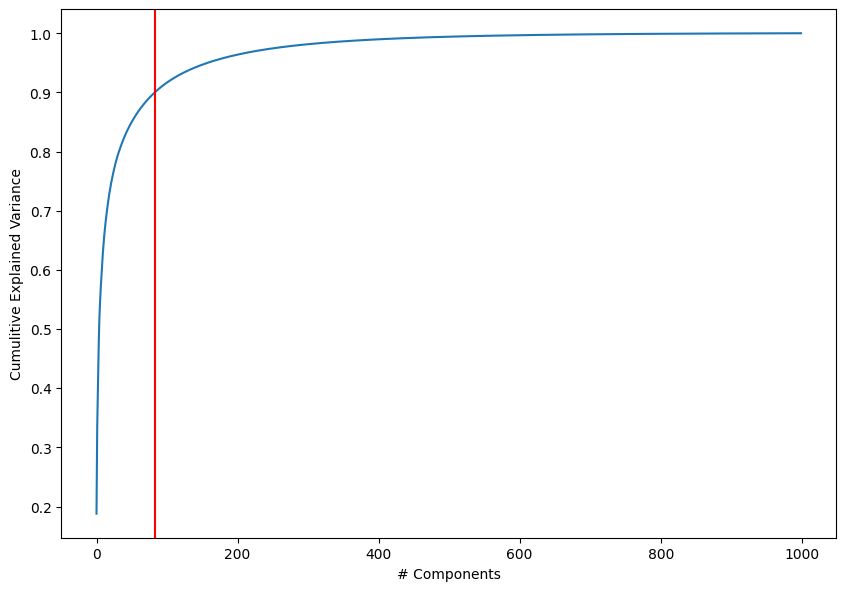

In [46]:
projected, cum_var, _ = PCATransformer(faces.data,1000)
th = 0
while cum_var[th] < 0.9:
    th +=1
print(th)
fig= plt.figure(figsize=(10,7))
fig.set_dpi(100)
plt.plot(cum_var)
plt.axvline(x=th, color='red')
plt.xlabel('# Components')
plt.ylabel('Cumulitive Explained Variance')
plt.show()

Part C

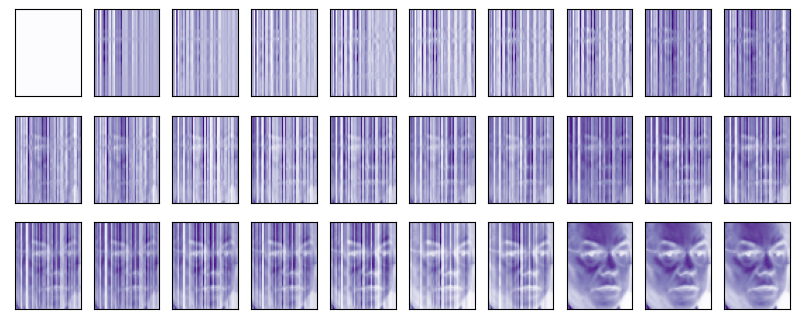

In [87]:
fig, ax = plt.subplots(3, 10,figsize=(10,4))
fig.set_dpi(100)
for i in range(30):

    projected, _, eig = PCATransformer(faces.images[0], int(1.8*i))
    recon = projected.dot(eig)
    ax[int(i/10),i%10].imshow(recon, cmap='Purples') 

    ax[int(i/10),i%10].get_xaxis().set_ticks([])
    ax[int(i/10),i%10].get_yaxis().set_ticks([])

Part D:

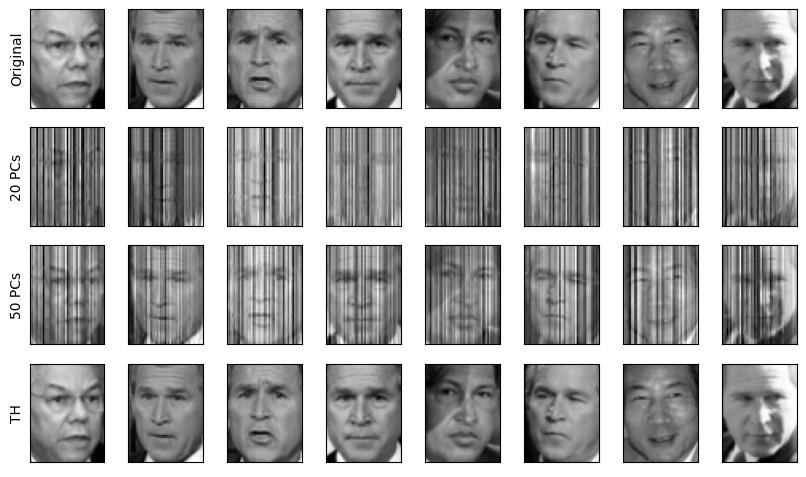

In [86]:
fig, ax = plt.subplots(4, 8,figsize=(10,6))
fig.set_dpi(100)
for i in range(8):
    ax[0,i].imshow(faces.images[i], cmap='gray')    # Original Image

    projected, _, eig = PCATransformer(faces.images[i], 20)
    recon = projected.dot(eig)
    ax[1,i].imshow(recon, cmap='gray')      # 20 PC

    projected, _, eig = PCATransformer(faces.images[i], 40)
    recon = projected.dot(eig)
    ax[2,i].imshow(recon, cmap='gray')      # 50 PC

    projected, _, eig = PCATransformer(faces.images[i], th)
    recon = projected.dot(eig)
    ax[3,i].imshow(recon, cmap='gray')      # Optimum TH PC


    ax[0,i].get_xaxis().set_ticks([])
    ax[0,i].get_yaxis().set_ticks([])
    ax[1,i].get_xaxis().set_ticks([])
    ax[1,i].get_yaxis().set_ticks([])
    ax[2,i].get_xaxis().set_ticks([])
    ax[2,i].get_yaxis().set_ticks([])
    ax[3,i].get_xaxis().set_ticks([])
    ax[3,i].get_yaxis().set_ticks([])

rows = ['Original', '20 PCs', '50 PCs', 'TH']

for ax, row in zip(ax[:,0], rows):
    ax.set_ylabel(row)